In [26]:
import sys
sys.path.append('/home/ylindf/projects/tools')

from global_utils import args2header, save_args, save_cmd, LYCSVLogger
from global_ana import find_logs, find_logs_by_multikeys
from global_ana import find_models_in_logs
from global_ana import eval_run
from global_ana import format_groupby
import pandas as pd
import numpy as np

# find logs by keys
exps = find_logs(path="logs", key="CMNIST0502171347")
# find model in the logs
log_models = find_models_in_logs(exps)
eval_reses = []
all_dfs = []
for exp in exps:
    model = log_models[exp]
    df = pd.read_csv("%s/res.csv" % exp)
    df["model"] = model
    all_dfs.append(df)
    # read the result files
    eval_res = eval_run(df, 
             value_list=["train_nll","train_acc",
                 "train_penalty","test_acc"],
             slice_by="restart",
             order_by="epoch")
    for eval_item in eval_res:
        full_item = {"model": model}
        full_item.update(eval_item)
        eval_reses.append(full_item)
res_df = pd.DataFrame(eval_reses)
res_df["train_penalty"] = res_df["train_penalty"] * 10e6
res_df["train_nll"] = res_df["train_nll"] * 100
res_df["train_acc"] = res_df["train_acc"] * 100
res_df["test_acc"] = res_df["test_acc"] * 100

format_groupby(res_df, 
               key="model", 
               mean_std_flds=["train_acc","test_acc","train_nll","train_penalty"],
               mean_flds=["total_epoch"],
               count_flds=["best_loc"])

,model,train_acc,test_acc,train_nll,train_penalty,total_epoch,best_loc
0,mix_up=0,$67.12 \pm 0.84$,$59.78 \pm 3.82$,$61.42 \pm 0.62$,$0.01 \pm 0.00$,501.00,5
1,mix_up=1,$67.33 \pm 0.69$,$61.14 \pm 1.20$,$60.09 \pm 1.09$,$0.03 \pm 0.04$,501.00,5


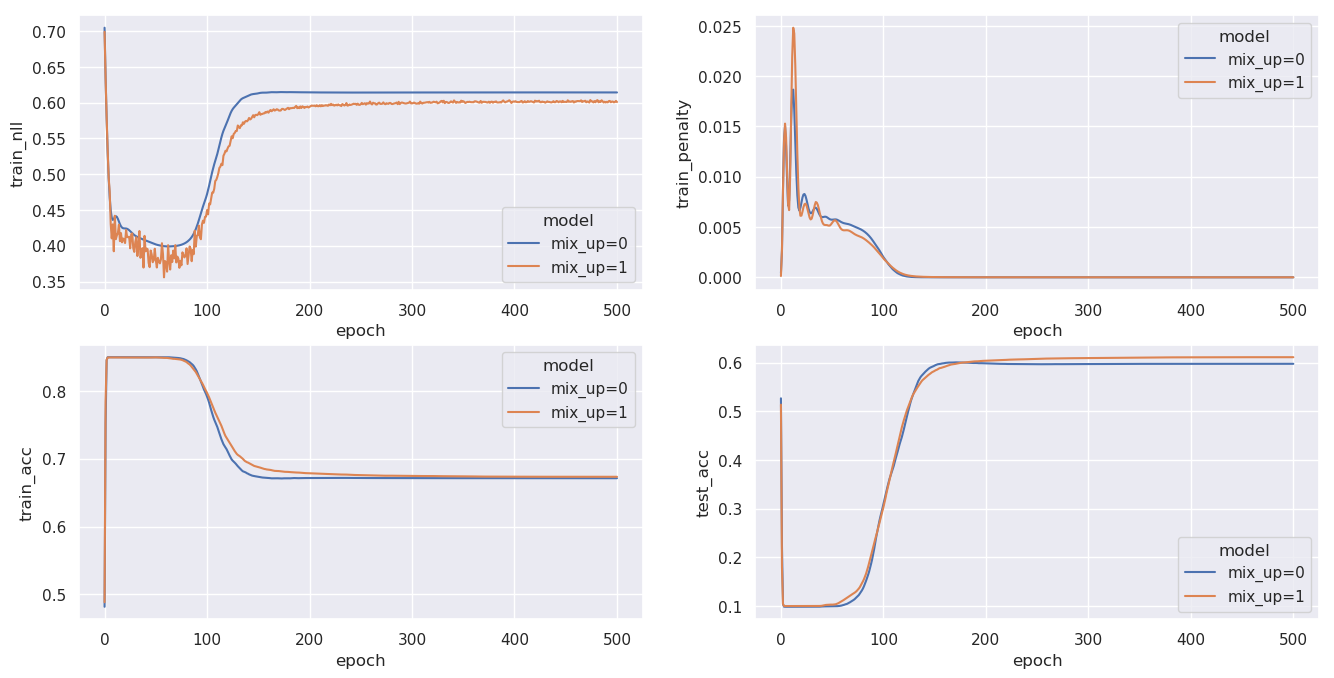

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
# Apply the default theme
sns.set_theme()
import matplotlib as mpl

mpl.rcParams['figure.dpi']= 100
mpl.rcParams['figure.figsize']= (16,8)

fast = True

plot_fields = ["train_nll","train_penalty","train_acc","test_acc"]
x_axis = "epoch"
key="model"
fig, axis = plt.subplots(nrows=(len(plot_fields) + 1) // 2, ncols=2)

full_df = pd.concat(all_dfs)
if fast == True:
    full_df = full_df.groupby(["model", "epoch"]).mean().reset_index()
    full_df = full_df.sort_values(by="epoch")
for ipf in range(len(plot_fields)):
    sns.lineplot(
        x=full_df[x_axis], y=full_df[plot_fields[ipf]],
        hue=full_df[key], ax=axis[ipf // 2, ipf % 2])
plt.show()